In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Rescaling

In [19]:
directory = "../photos"

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory,
    validation_split=0.2,
    subset="validation",
    seed=123,
    shuffle=True,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# val is 20% of the data
val_batches = val_ds.cardinality()

#take 50% of the validation data, so validation is 10% of the data and test is 10% of the data
test_ds = val_ds.take(val_batches // 2)
val_ds = val_ds.skip(val_batches // 2)

print('Batches for testing -->', test_ds.cardinality())
print('Batches for validating -->', val_ds.cardinality())

Found 10042 files belonging to 20 classes.
Using 8034 files for training.
Found 10042 files belonging to 20 classes.
Using 2008 files for validation.
Batches for testing --> tf.Tensor(31, shape=(), dtype=int64)
Batches for validating --> tf.Tensor(32, shape=(), dtype=int64)


In [21]:
class_names = train_ds.class_names
print(class_names)

['ancient_city_(mueang_boran)', 'big_buddha_phuket', 'big_buddha_temple_(wat_phra_yai)', 'chaithararam_temple_(wat_chalong)', 'chinatown_-_bangkok', 'historic_city_of_ayutthaya', 'jim_thompson_house', 'sukhothai_historical_park', 'temple_of_dawn_(wat_arun)', 'temple_of_the_emerald_buddha_(wat_phra_kaew)', 'temple_of_the_golden_buddha_(wat_traimit)', 'the_golden_mount_(wat_saket)', 'the_grand_palace', 'the_sanctuary_of_truth', 'tiger_cave_temple_(wat_tham_suea)', 'wat_chedi_luang_varavihara', 'wat_phra_chetuphon_(wat_pho)', 'wat_phra_singh', 'wat_rong_khun', 'wat_umong']


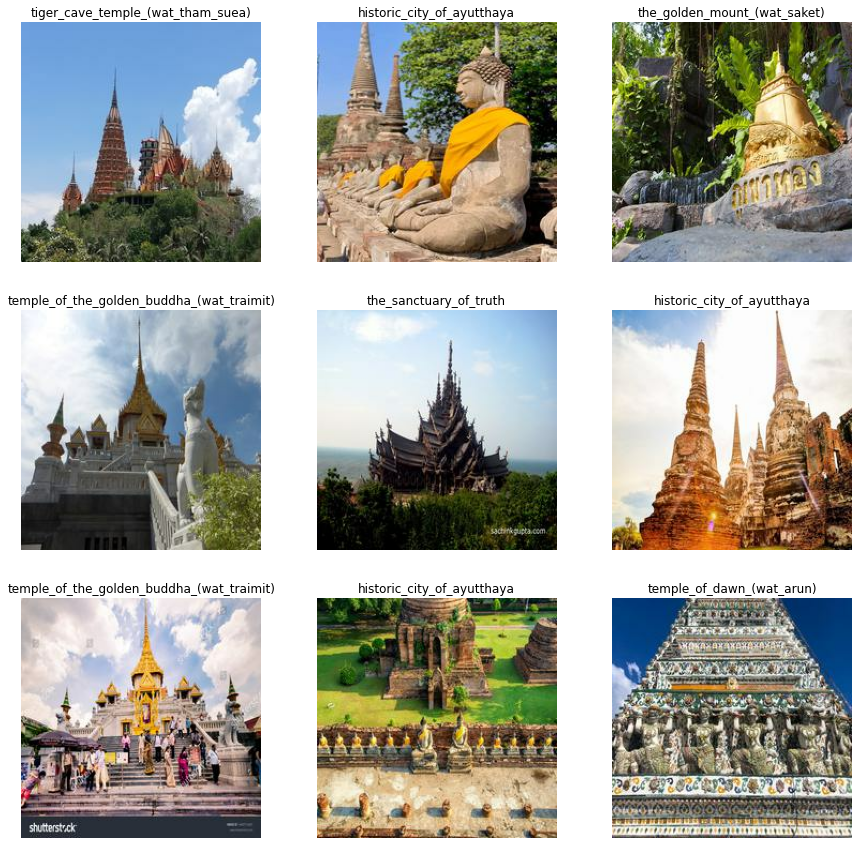

In [27]:
plt.figure(figsize=(15, 15))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [28]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 224, 224, 3)
(32,)


In [43]:
num_classes = 20

model=Sequential()

model.add(Rescaling(1./255, input_shape=(224, 224,3)))
model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())    

# model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())
    
model.add(Flatten())
model.add(Dense(128,activation="relu"))
    
model.add(Dense(num_classes,activation="softmax"))
    
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_19 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 conv2d_20 (Conv2D)          (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 32)     0         
 g2D)                                                            
                                                                 
 batch_normalization_11 (Bat  (None, 110, 110, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 108, 108, 64)     

In [45]:
model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=5)

Epoch 1/5
252/252 [==============================] - 486s 2s/step - loss: 5.4720 - accuracy: 0.0707 - val_loss: 2.9964 - val_accuracy: 0.0748
Epoch 2/5
252/252 [==============================] - 456s 2s/step - loss: 2.9044 - accuracy: 0.1036 - val_loss: 3.1756 - val_accuracy: 0.0758
Epoch 3/5
252/252 [==============================] - 466s 2s/step - loss: 2.7450 - accuracy: 0.1418 - val_loss: 3.2314 - val_accuracy: 0.0965
Epoch 4/5
252/252 [==============================] - 501s 2s/step - loss: 2.5197 - accuracy: 0.1993 - val_loss: 4.6900 - val_accuracy: 0.1230
Epoch 5/5
252/252 [==============================] - 509s 2s/step - loss: 2.2924 - accuracy: 0.2615 - val_loss: 4.3305 - val_accuracy: 0.1299


In [1]:
model.predict(test_ds)

NameError: name 'model' is not defined